# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(f"API Key: {weather_api_key}")

API Key: ad036faf60c1db1933c34723c38bcb1e


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

count = 1
sets = 1

df = pd.DataFrame({"City":cities})
df["Lat"]=""
df["Lng"]=""
df["Max Temp"]=""
df["Humidity"]=""
df["Cloudiness"]=""
df["Wind Speed"]=""
df["Country"]=""
df["Date"]=""

print("Beginning Data Retrieval")
print("------------------------")
for index, row in df.iterrows():
    city = row["City"]
    city_url = url + "&q=" + city
    response = requests.get(city_url).json()
    try:
        df.loc[index,"Lat"] = response["coord"]["lat"]
        df.loc[index,"Lng"] = response["coord"]["lon"]
        df.loc[index,"Max Temp"] = response["main"]["temp_max"]
        df.loc[index,"Humidity"] = response["main"]["humidity"]
        df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        df.loc[index,"Wind Speed"] = response["wind"]["speed"]
        df.loc[index,"Country"] = response["sys"]["country"]
        df.loc[index,"Date"] = response["dt"]
    except:
        df.loc[index,"Lat"] = ""
        df.loc[index,"Lng"] = ""
        df.loc[index,"Max Temp"] = ""
        df.loc[index,"Humidity"] = ""
        df.loc[index,"Cloudiness"] = ""
        df.loc[index,"Wind Speed"] = ""
        df.loc[index,"Country"] = ""
        df.loc[index,"Date"] = ""
    if count == 50:
        count = 0
        sets = sets + 1
print("------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
------------------------
------------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6,168.333,48.99,88,90,10.63,NZ,1620662470
1,kloulklubed,7.0419,134.256,77,94,90,5.75,PW,1620662484
2,coahuayana,18.7333,-103.683,77,78,75,5.41,MX,1620662485
3,kapaa,22.0752,-159.319,75.2,73,75,11.5,US,1620662485
4,port alfred,-33.5906,26.891,65.57,80,1,15.12,ZA,1620662485


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df.replace("", np.nan, inplace=True)
df = df.dropna()
clean_city_data = pd.DataFrame(df)
clean_city_data.to_csv("weather_data.csv",index=False)

In [9]:
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,48.99,88.0,90.0,10.63,NZ,1.620662e+09
1,kloulklubed,7.0419,134.2556,77.00,94.0,90.0,5.75,PW,1.620662e+09
2,coahuayana,18.7333,-103.6833,77.00,78.0,75.0,5.41,MX,1.620662e+09
3,kapaa,22.0752,-159.3190,75.20,73.0,75.0,11.50,US,1.620662e+09
4,port alfred,-33.5906,26.8910,65.57,80.0,1.0,15.12,ZA,1.620662e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

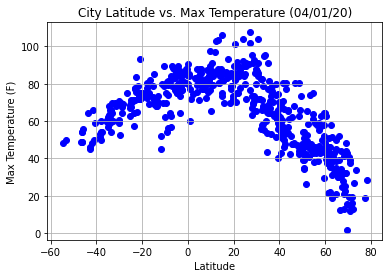

In [14]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], c="blue")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle = "-")
plt.show()

## Latitude vs. Humidity Plot

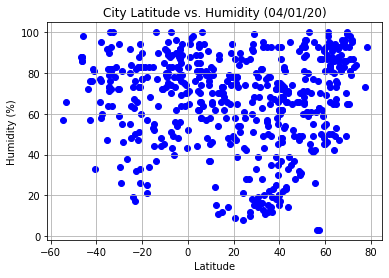

In [15]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], c="blue")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle = "-")
plt.show()

## Latitude vs. Cloudiness Plot

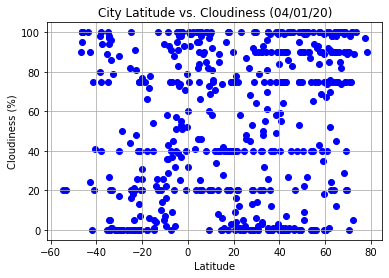

In [16]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], c="blue")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle = "-")
plt.show()

## Latitude vs. Wind Speed Plot

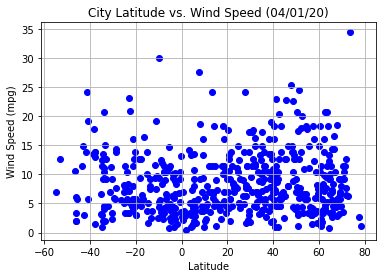

In [17]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], c="blue")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.grid(linestyle = "-")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
#North
north = clean_city_data.loc[(clean_city_data['Lat'] >= 0) & (clean_city_data['Lat'] <= 90)]
north.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,kloulklubed,7.0419,134.2556,77.0,94.0,90.0,5.75,PW,1.620662e+09
2,coahuayana,18.7333,-103.6833,77.0,78.0,75.0,5.41,MX,1.620662e+09
3,kapaa,22.0752,-159.3190,75.2,73.0,75.0,11.50,US,1.620662e+09
6,yellowknife,62.4560,-114.3525,41.0,93.0,90.0,16.11,CA,1.620662e+09
8,marfino,55.7028,37.3822,59.0,26.0,0.0,11.18,RU,1.620662e+09


In [19]:
#South
south = clean_city_data.loc[(clean_city_data['Lat'] >= -90) & (clean_city_data['Lat'] <= 0)]
south.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,48.99,88.0,90.0,10.63,NZ,1.620662e+09
4,port alfred,-33.5906,26.8910,65.57,80.0,1.0,15.12,ZA,1.620662e+09
7,castro,-24.7911,-50.0119,71.19,48.0,20.0,3.36,BR,1.620662e+09
9,busselton,-33.6500,115.3333,54.00,93.0,96.0,1.99,AU,1.620662e+09
11,mar del plata,-38.0023,-57.5575,60.01,58.0,40.0,13.80,AR,1.620662e+09


r-squared: -0.8390451901378158


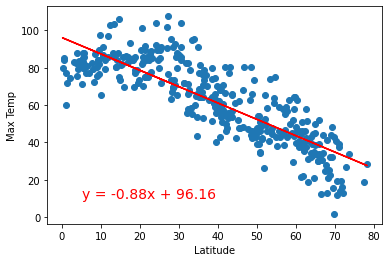

In [20]:
x_values = north['Lat'].astype('float64')
y_values = north['Max Temp'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,10),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"r-squared: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.754834334504476


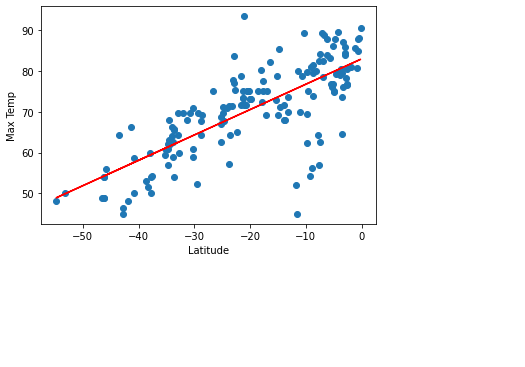

In [21]:
x_values = south['Lat'].astype('float64')
y_values = south['Max Temp'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,10),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"r-squared: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.14222507635415563


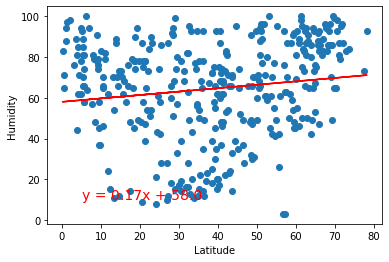

In [22]:
x_values = north['Lat'].astype('float64')
y_values = north['Humidity'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,10),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"r-squared: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: -0.0043912384672210305


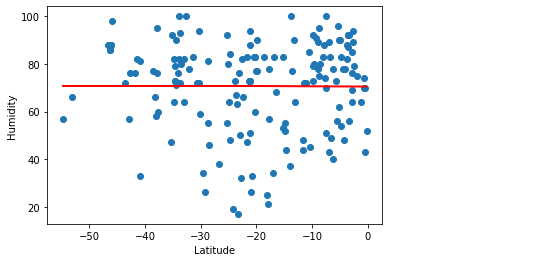

In [23]:
x_values = south['Lat'].astype('float64')
y_values = south['Humidity'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,10),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"r-squared: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.1643246295354992


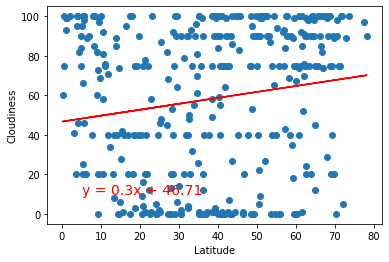

In [24]:
x_values = north['Lat'].astype('float64')
y_values = north['Cloudiness'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,10),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"r-squared: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.023465590618324754


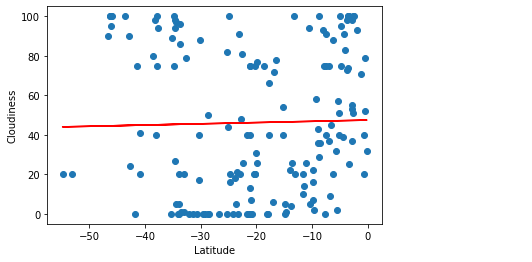

In [25]:
x_values = south['Lat'].astype('float64')
y_values = south['Cloudiness'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,10),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"r-squared: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.11608726477204918


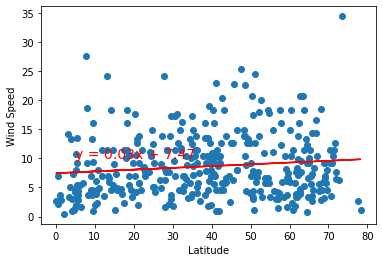

In [26]:
x_values = north['Lat'].astype('float64')
y_values = north['Wind Speed'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,10),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"r-squared: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.15973553764828435


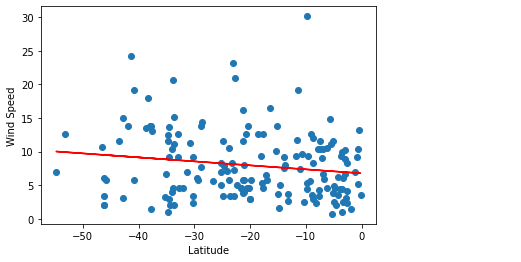

In [27]:
x_values = south['Lat'].astype('float64')
y_values = south['Wind Speed'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,10),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"r-squared: {rvalue}")
plt.show()